# Monte Carlo Method for Learning State-Value Functions 

First of all, we need to recall the definition of the state value function:


where s is the state, S{t} is a state at the time step t, G{t} is the weighted return defined as follows


where gamma in [0,1] is the discount rate, R{i}, i=t+1,t+2.. is the reward obtained by at the time step i, and pi is the policy that an agent is following.

We can clearly observe that the state value function is a mathematical expectation. Roughly speaking, the expected value can be seen as a value obtained by repeating a random experiment an infinite number of times and calculating an average value of the values observed during each random experiment. That is an average of random variables converge to the expectation as the number of experiment increases.

Motivated by this, the main idea of the Monte Carlo method is to simply run many episodes and observe the corresponding state trajectories and obtained rewards. Then, on the basis of this information, the Monte Carlo method approximates the state value function as an average return (weighted sum of rewards) of the returns observed in random episodes.

Let us illustrate this idea graphically. Consider the Frozen Lake environment.
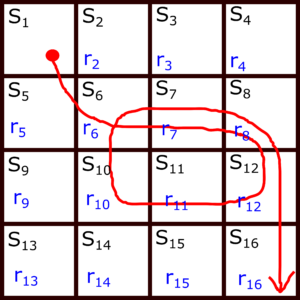

The red line represents states visited during an episode. The start state is s{1} (note that particular states are denoted by the lower case letters). Then end state is the state s{16}. This is a terminal state The state trajectory can be represented as

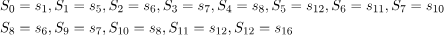

Note here that with capital letters S{i}, we denote states in a time sequence, where the index i is the time step.

Each occurrence of the state s{i} in an episode is called a visit. The obtained rewards in the sequence are

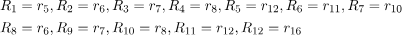

Let us for a moment assume that the discount rate is gamma=1. Since we only have a single episode, the average return for every state will be equal to the return obtained at this single episode. For example, on the basis of only this single episode, we obtain the following estimates of the state value functions by using the Monte Carlo method. The state s{1} is the state at the position S{0} in the time sequence. Consequencely, we have

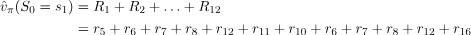

On the other hand, let us focus on the state s{6} and let us estimate its state value function. This state is visited twice in the sequence, at the time step t=2, that is S{2}=s{6}, and at the time step t=8, that is S{8}=s{6}. The main question is what time instant or what visit of s{6} should be taken into account when computing the return? In the first visit Monte Carlo method, we compute the return starting from the first visit of the state in the sequence. That is, we count the return starting from the time step t=2. When we reach s{6} again later in the sequence (at the time instant t=8), we also count again the reward obtained by visiting the state s{6} for the second time. That is the main idea of the first visit method. Consequently, the state value function at s{6} is

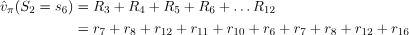

Note here that R{2}=r{6} is not included in the sum, due to the definition of the state value function. That is, for the state at the time step t, the sum of rewards starts at t+1.

In the second episode, we observe the rewards and compute the return from every state in the sequence by using a similar strategy. We also count the number of first visits to the particular state. Then, we add these returns to the corresponding returns from the first episode and divide the result by two if the state is visited in this episode. We repeat this process. Generally speaking, if we have N episodes, for every state, we sum the returns in every episode and obtain a total sum of returns. Then we divide this sum of returns by the number of times a particular state was visited for the first time during these N episodes. The result will give us an estimate of the state value function for the particular state. Consider the three episodes shown in the figure below.

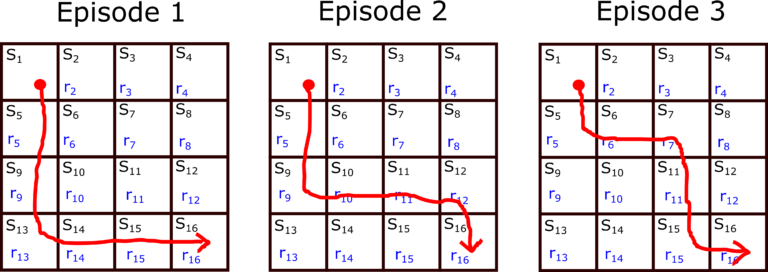

Let us first estimate the value function at the state s{1}. The returns from the state s{1} for these three episodes is

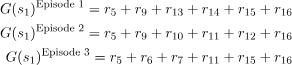

Since the state s{1} is visited 3 times, we have

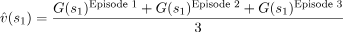

Next, let us estimate the state value function at the state s{9}. The state s{9} is visited in Episode 1 and Episode 2. However, it is not visited in Episode 3. Consequently, since the state s{9} is visited two times, we have

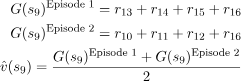

The structure of the Python code should roughly be like this

1-Create a for loop that will in every loop simulate an episode. Create vectors that store total returns and the total number of visits for every state during simulated episodes.

2-In every episode simulation, that is every iteration of the loop, compute the return from every visited state.

3-In every iteration of the loop, update the vectors that store the total return and the total number of visits for every particular state.

4-After the loop is completed, divide every entry of the vector storing total returns by the number of visits of a particular state.

The function that implements the first visit Monte Carlo method is given below.



In [ ]:
def MonteCarloLearnStateValueFunction(env,stateNumber,numberOfEpisodes,discountRate):
    import numpy as np
     
    # sum of returns for every state
    sumReturnForEveryState=np.zeros(stateNumber)
    # number of visits of every state
    numberVisitsForEveryState=np.zeros(stateNumber)
     
    # estimate of the state value function vector
    valueFunctionEstimate=np.zeros(stateNumber)
     
    ###########################################################################
    # START - episode simulation
    ###########################################################################
    for indexEpisode in range(numberOfEpisodes):
        # this list stores visited states in the current episode
        visitedStatesInEpisode=[]
        # this list stores the return in every visited state in the current episode
        rewardInVisitedState=[]
        (currentState,prob)=env.reset()
        visitedStatesInEpisode.append(currentState)
         
        print("Simulating episode {}".format(indexEpisode))
         
         
        ###########################################################################
        # START - single episode simulation
        ###########################################################################
        # here we randomly generate actions and step according to these actions
        # when the terminal state is reached, this loop breaks
        while True:
             
            # select a random action
            randomAction= env.action_space.sample()
             
            # explanation of "env.action_space.sample()"
            # Accepts an action and returns either a tuple (observation, reward, terminated, truncated, info)
            # https://www.gymlibrary.dev/api/core/#gym.Env.step
            # format of returnValue is (observation,reward, terminated, truncated, info)
            # observation (object)  - observed state
            # reward (float)        - reward that is the result of taking the action
            # terminated (bool)     - is it a terminal state
            # truncated (bool)      - it is not important in our case
            # info (dictionary)     - in our case transition probability
            # env.render()
             
            # here we step and return the state, reward, and boolean denoting if the state is a terminal state
            (currentState, currentReward, terminalState,_,_) = env.step(randomAction)          
             
            # append the reward
            rewardInVisitedState.append(currentReward)
             
            # if the current state is NOT terminal state 
            if not terminalState:
                visitedStatesInEpisode.append(currentState)   
            # if the current state IS terminal state 
            else: 
                break
            # explanation of IF-ELSE:
            # let us say that a state sequence is 
            # s0, s4, s8, s9, s10, s14, s15
            # the vector visitedStatesInEpisode is then 
            # visitedStatesInEpisode=[0,4,8,10,14]
            # note that s15 is the terminal state and this state is not included in the list
             
            # the return vector is then
            # rewardInVisitedState=[R4,R8,R10,R14,R15]
            # R4 is the first entry, meaning that this is the reward going
            # from state s0 to s4. That is, the rewards correspond to the reward
            # obtained in the destination state
         
        ###########################################################################
        # END - single episode simulation
        ###########################################################################
         
         
        # how many states we visited in an episode    
        numberOfVisitedStates=len(visitedStatesInEpisode)
             
        # this is Gt=R_{t+1}+\gamma R_{t+2} + \gamma^2 R_{t+3} + ...
        Gt=0
        # we compute this quantity by using a reverse "range" 
        # below, "range" starts from len-1 until second argument +1, that is until 0
        # with the step that is equal to the third argument, that is, equal to -1
        # here we do everything backwards since it is easier and faster 
        # if we go in the forward direction, we would have to 
        # compute the total return for every state, and this will be less efficient
         
        for indexCurrentState in range(numberOfVisitedStates-1,-1,-1):
                 
            stateTmp=visitedStatesInEpisode[indexCurrentState] 
            returnTmp=rewardInVisitedState[indexCurrentState]
               
            # this is an elegant way of summing the returns backwards 
               
            Gt=discountRate*Gt+returnTmp
               
            # below is the first visit implementation 
            # here we say that if visitedStatesInEpisode[indexCurrentState] is 
            # visited for the first time, then we only count that visit
            # here also note that the notation a[0:3], includes a[0],a[1],a[2] and it does NOT include a[3]
            if stateTmp not in visitedStatesInEpisode[0:indexCurrentState]:
                # note that this state is visited in the episode
                numberVisitsForEveryState[stateTmp]=numberVisitsForEveryState[stateTmp]+1
                # add the sum for that state to the total sum for that state
                sumReturnForEveryState[stateTmp]=sumReturnForEveryState[stateTmp]+Gt
             
     
    ###########################################################################
    # END - episode simulation
    ###########################################################################
     
    # finally we need to compute the final estimate of the state value function vector
    for indexSum in range(stateNumber):
        if numberVisitsForEveryState[indexSum] !=0:
            valueFunctionEstimate[indexSum]=sumReturnForEveryState[indexSum]/numberVisitsForEveryState[indexSum]
         
    return valueFunctionEstimate

In the sequel, we explain this code. The following two vectors

In [ ]:
# sum of returns for every state
sumReturnForEveryState=np.zeros(stateNumber)
# number of visits of every state
numberVisitsForEveryState=np.zeros(stateNumber)

Are used to store the sum of episode returns for every state, and the sum of first visits of every state. These vectors are updated after every episode is simulated. The code lines 31 to 59 are used to simulate an episode. We generate a random action (code line 34), and we observe the destination state and the reward obtained by stepping to this state (code line 48). Note that the function on the code line 48 also returns a boolean variable denoting if the destination state is terminal or not (variable “terminalState”). The code line 51 is used to append the obtained reward. The code lines 54-58 are used to append the state sequence (stored in the vector “currentState”). At the end of this section we will have two lists/vectors. The vector “visitedStatesInEpisode” will contain a sequence of visited states and the vector “rewardInVisitedState” will consist of obtained rewards. For example, let us say that the visited state sequence is s_{0}, s_{4}, s_{8}, s_{9}, s{10}, s{14}, s{15} (note that OpenAI Gym counts the states starting from 0). Then, visitedStatesInEpisode=[0,4,8,10,14]. Note that the terminal state s{15} is not included in the list.

The code lines 78 to 106 are used to compute the return and to count the number of visits. The for loop in the code line 89 iterates through the entries of visitedStatesInEpisode backwards. This is done in order to simplify the computation of the return for every state in this sequence. Namely, we can represent the return as follows:



We can represent this summation backward as follows

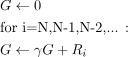

where R_{i} is the obtained reward at the time step i. This is actually implemented in the code line 96. The rest of the code is self-explanatory.

When developing a new method it is always a good idea to compare the method with the existing approaches. In this way we can evaluate the method’s accuracy and performance. We compare the first visit Monte Carlo method, with an iterative policy evaluation method for computing the state value function. The function below that implements the iterative policy evaluation algorithm is explained in this post, and for completeness of this tutorial is given below.

In [ ]:
##################
# this function computes the state value function by using the iterative policy evaluation algorithm
##################
# inputs: 
##################
# env - environment 
# valueFunctionVector - initial state value function vector
# policy - policy to be evaluated - this is a matrix with the dimensions (number of states)x(number of actions)
#        - p,q entry of this matrix is the probability of selection action q in state p
# discountRate - discount rate 
# maxNumberOfIterations - max number of iterations of the iterative policy evaluation algorithm
# convergenceTolerance - convergence tolerance of the iterative policy evaluation algorithm
##################
# outputs:
##################
# valueFunctionVector - final value of the state value function vector 
##################
 
def evaluatePolicy(env,valueFunctionVector,policy,discountRate,maxNumberOfIterations,convergenceTolerance):
    import numpy as np
    convergenceTrack=[]
    for iterations in range(maxNumberOfIterations):
        convergenceTrack.append(np.linalg.norm(valueFunctionVector,2))
        valueFunctionVectorNextIteration=np.zeros(env.observation_space.n)
        for state in env.P:
            outerSum=0
            for action in env.P[state]:
                innerSum=0
                for probability, nextState, reward, isTerminalState in env.P[state][action]:
                    #print(probability, nextState, reward, isTerminalState)
                    innerSum=innerSum+ probability*(reward+discountRate*valueFunctionVector[nextState])
                outerSum=outerSum+policy[state,action]*innerSum
            valueFunctionVectorNextIteration[state]=outerSum
        if(np.max(np.abs(valueFunctionVectorNextIteration-valueFunctionVector))<convergenceTolerance):
            valueFunctionVector=valueFunctionVectorNextIteration
            print('Iterative policy evaluation algorithm converged!')
            break
        valueFunctionVector=valueFunctionVectorNextIteration       
    return valueFunctionVector
 
##################

Also, we will need the code below that is used to visualize the results.

In [ ]:
##################
# this function visualizes and saves the state value function 
##################
# inputs: 
##################
# valueFunction - state value function vector to plot
# reshapeDim - reshape dimension
# fileNameToSave - file name to save the figure
def grid_print(valueFunction,reshapeDim,fileNameToSave):
    import seaborn as sns
    import matplotlib.pyplot as plt  
    ax = sns.heatmap(valueFunction.reshape(reshapeDim,reshapeDim),
                     annot=True, square=True,
                     cbar=False, cmap='Blues',
                     xticklabels=False, yticklabels=False)
    plt.savefig(fileNameToSave,dpi=600)
    plt.show()
##################

Below is the driver code that demonstrates how to use the developed functions:

In [ ]:
"""
Reinforcement Learning Tutorial:
 
First Visit Monte Carlo Method for Learning the state value function 
for a given policy
 
Tested on the Frozen Lake OpenAI Gym environment.
Author: Aleksandar Haber 
Date: December 2022 
 
This is the driver code that coles functions from "functions.py"
 
"""
 
import gym
import numpy as np  
 
from functions import MonteCarloLearnStateValueFunction
from functions import evaluatePolicy
from functions import grid_print
 
# create an environment 
 
# note here that we create only a single hole to makes sure that we do not need
# a large number of simulations
# generate a custom Frozen Lake environment
desc=["SFFF", "FFFF", "FFFF", "HFFG"]
 
# here we render the environment- use this only for illustration purposes
# env=gym.make('FrozenLake-v1', desc=desc, map_name="4x4", is_slippery=True,render_mode="human")
 
# uncomment this and comment the previous line in the case of a large number of simulations
env=gym.make('FrozenLake-v1', desc=desc, map_name="4x4", is_slippery=True)
 
# number of states in the environment
stateNumber=env.observation_space.n
 
# number of simulation episodes
numberOfEpisodes=10000
 
# discount rate
discountRate=1
# estimate the state value function by using the Monte Carlo method
estimatedValuesMonteCarlo=MonteCarloLearnStateValueFunction(env,stateNumber=stateNumber,numberOfEpisodes=numberOfEpisodes,discountRate=discountRate)
 
 
# for comparison compute the state value function vector by using the iterative policy 
# evaluation algorithm
 
# select an initial policy
# initial policy starts with a completely random policy
# that is, in every state, there is an equal probability of choosing a particular action
initialPolicy=(1/4)*np.ones((16,4))
 
# initialize the value function vector
valueFunctionVectorInitial=np.zeros(env.observation_space.n)
# maximum number of iterations of the iterative policy evaluation algorithm
maxNumberOfIterationsOfIterativePolicyEvaluation=1000
# convergence tolerance 
convergenceToleranceIterativePolicyEvaluation=10**(-6)
 
# the iterative policy evaluation algorithm
valueFunctionIterativePolicyEvaluation=evaluatePolicy(env,valueFunctionVectorInitial,initialPolicy,1,maxNumberOfIterationsOfIterativePolicyEvaluation,convergenceToleranceIterativePolicyEvaluation)
 
# plot the result
grid_print(valueFunctionIterativePolicyEvaluation,reshapeDim=4,fileNameToSave='iterativePolicyEvaluationEstimated.png')
 
# plot the result
grid_print(estimatedValuesMonteCarlo,reshapeDim=4,fileNameToSave='monteCarloEstimated.png')     

First, we import the necessary libraries and the developed functions. Then we create a custom Frozen Lake environment with only a single hole. This is done in order to have a relatively small number of necessary episodes to evaluate the state value functions. If we have too many holes, then most of the times we will never reach the goal terminal state since we will stuck in the holes most of the times. Then, on the code line 45 we compute the state value function vector by using the Monte Carlo method. Then, for comparison we use the iterative policy evaluation algorithm to compute the state value function vector. We select a random policy in the code line 54, and on the code line 64 we call the function that computes the state value function. Finally, we plot the results on the grids that are shown below.

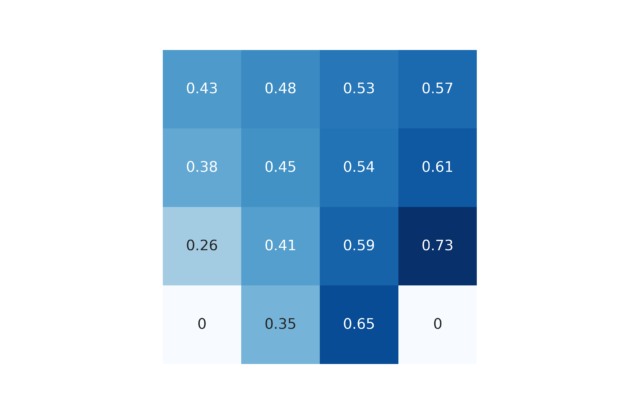
State value functions estimated by using the Monte Carlo method

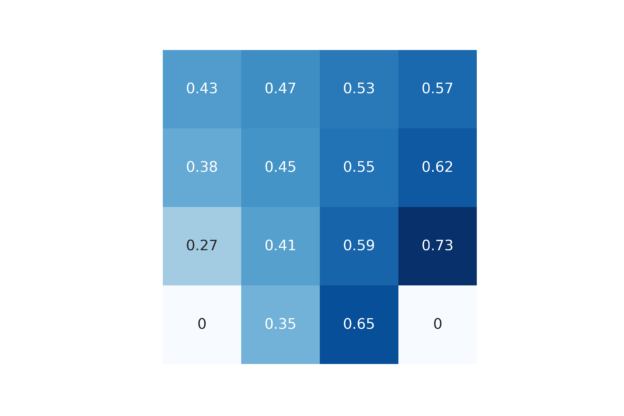
State value function estimated by using the iterative policy evaluation algorithm.
We can see that the results present in the 2 figures  are identical up to 2 decimal spaces.